In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

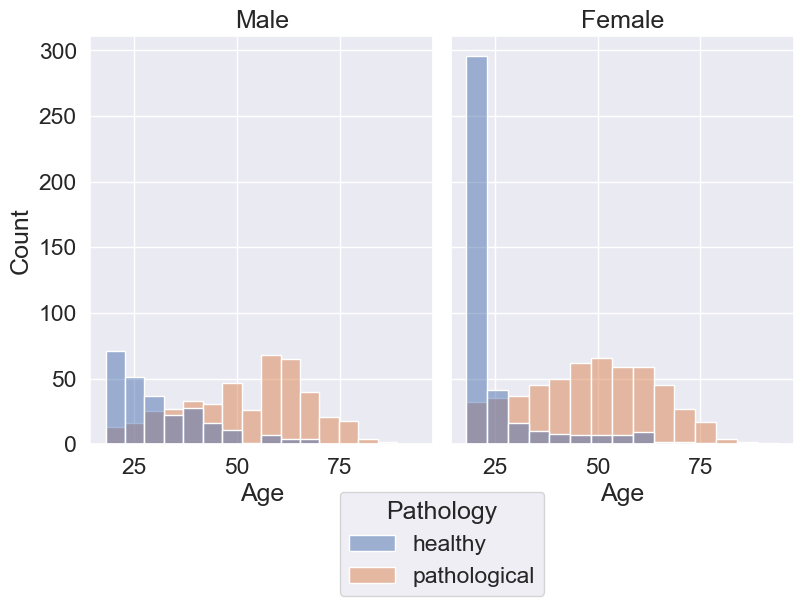

In [100]:
sns.set(font_scale=1.5)
# Age distribution split on sex
sexes = ["Male", "Female"]
conditions = ["healthy", "pathological"]

data = pd.read_csv("features.csv")
data.rename(columns={"age": "Age", "pathology":"Pathology"}, inplace=True)
data.Pathology = data.Pathology.apply(lambda x: conditions[x])

# Figure
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(8, 6))

for idx, sex in enumerate(sexes):
    sns.histplot(data[data.sex == idx], x="Age", hue="Pathology", bins=15, ax=axs[idx], legend=idx)
    axs[idx].set_title(sex)

sns.move_legend(axs[1], "lower center", bbox_to_anchor=(-0.025, -0.4))
# axs[1].legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
# plt.tight_layout()
plt.subplots_adjust(wspace=0.05, bottom=0.27, left=0.11, right=0.99, top=0.95)
fig.savefig("histogram.png")

In [103]:
data.groupby(["sex", "Pathology"])["Pathology"].count()

sex  Pathology   
0    healthy         252
     pathological    436
1    healthy         407
     pathological    541
Name: Pathology, dtype: int64

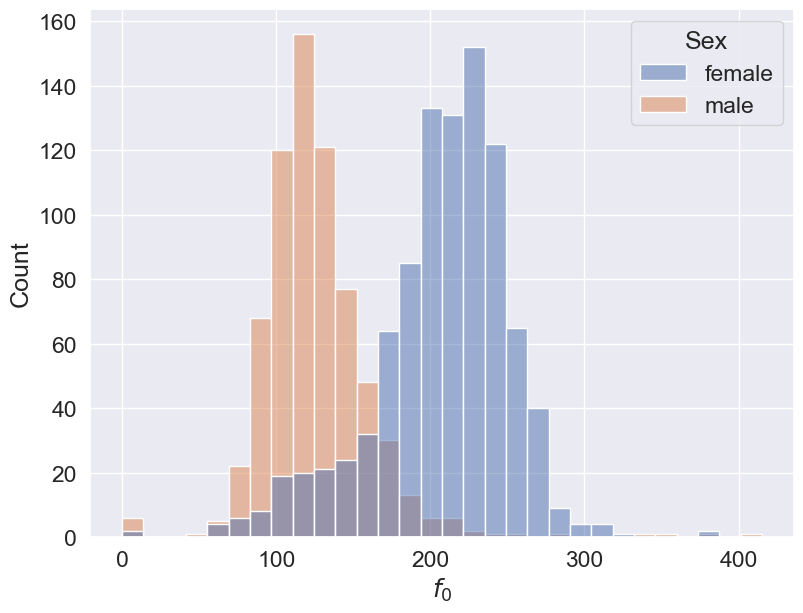

In [109]:
# Distribution of f0
sns.set(font_scale=1.5)
sexes = ["male", "female"]

data = pd.read_csv("features.csv")
data.rename(columns={"sex": "Sex"}, inplace=True)
data.Sex = data.Sex.apply(lambda x: sexes[x])

# Figure
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

sns.histplot(data, x="mean_f0", hue="Sex", bins=30, ax=axs)
axs.set_xlabel("$f_0$")
plt.subplots_adjust(left=0.11, right=0.99, top=0.99)
fig.savefig("mean_f0.png")

In [121]:
# Table with quantiles
data = pd.read_csv("features.csv")
data.pathology = data.pathology.apply(lambda x: ["Healthy", "Pathological"][x])
data.sex = data.sex.apply(lambda x: ["Male", "Female"][x])
grouped = data.groupby(["sex", "pathology"])["age"].describe(percentiles=[0, 0.25, 0.5, 0.75, 1]).transpose()

table_string = ""

for index, row in grouped.iterrows():
    string = index.replace("%", "\\% percentile") + " "
    for item in row:
        string += f"& {item:.2f} "
    string += " \\\\\n"
    table_string += string
print(table_string)


count & 407.00 & 541.00 & 252.00 & 436.00  \\
mean & 25.38 & 48.55 & 31.45 & 52.38  \\
std & 11.21 & 15.28 & 11.52 & 15.12  \\
min & 18.00 & 18.00 & 18.00 & 18.00  \\
0\% percentile & 18.00 & 18.00 & 18.00 & 18.00  \\
25\% percentile & 20.00 & 36.00 & 22.00 & 41.00  \\
50\% percentile & 21.00 & 49.00 & 28.00 & 55.50  \\
75\% percentile & 24.00 & 60.00 & 38.00 & 63.00  \\
100\% percentile & 84.00 & 94.00 & 69.00 & 89.00  \\
max & 84.00 & 94.00 & 69.00 & 89.00  \\



In [123]:
grouped

sex            Female                     Male             
pathology     Healthy Pathological     Healthy Pathological
count      407.000000   541.000000  252.000000   436.000000
mean        25.380835    48.550832   31.448413    52.376147
std         11.206302    15.281788   11.524153    15.120840
min         18.000000    18.000000   18.000000    18.000000
0%          18.000000    18.000000   18.000000    18.000000
25%         20.000000    36.000000   22.000000    41.000000
50%         21.000000    49.000000   28.000000    55.500000
75%         24.000000    60.000000   38.000000    63.000000
100%        84.000000    94.000000   69.000000    89.000000
max         84.000000    94.000000   69.000000    89.000000